# TP Apprentissage supervisé - Partie 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
feat_raw = pd.read_csv('acsincome_ca_features.csv')
label_raw = pd.read_csv('acsincome_ca_labels.csv', usecols=['PINCP'])[['PINCP']]

In [ ]:
feat_raw

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P
0,30.0,6.0,14.0,1.0,9610.0,6.0,16.0,40.0,1.0,8.0
1,21.0,4.0,16.0,5.0,1970.0,6.0,17.0,20.0,1.0,1.0
2,65.0,2.0,22.0,5.0,2040.0,6.0,17.0,8.0,1.0,1.0
3,33.0,1.0,14.0,3.0,9610.0,36.0,16.0,40.0,1.0,1.0
4,18.0,2.0,19.0,5.0,1021.0,6.0,17.0,18.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
195660,38.0,1.0,22.0,1.0,1021.0,210.0,0.0,40.0,1.0,6.0
195661,39.0,1.0,22.0,1.0,1021.0,210.0,1.0,40.0,2.0,6.0
195662,61.0,1.0,19.0,1.0,5240.0,17.0,0.0,45.0,1.0,1.0
195663,69.0,7.0,24.0,1.0,2040.0,207.0,0.0,45.0,1.0,6.0


In [ ]:
label_raw

,PINCP
0,False
1,False
2,False
3,False
4,False
...,...
195660,True
195661,True
195662,True
195663,False


# Preprocessing

In [ ]:
# There is no NA value.

def preprocess(X_init, y_init, ratio=0.04):
    # We normalize the ages
    scaler = RobustScaler()
    age_scaled = scaler.fit_transform(X_init[["AGEP", "WKHP"]])
    X_init[["AGEP", "WKHP"]] = age_scaled

    X_all, y_all = shuffle(X_init, y_init)

    # only use the first N samples to limit training time
    num_samples = int(len(X_all)*ratio)
    X, y = X_all.head(num_samples), y_all.head(num_samples)


    return X, y

In [ ]:
X, y = preprocess(feat_raw, label_raw)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = y_train.to_numpy().reshape(1,-1)[0]

In [ ]:
X_train

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P
77375,-0.76,1.0,21.0,5.0,4840.0,6.0,2.0,0.000,1.0,8.0
77285,-0.84,6.0,16.0,5.0,2722.0,6.0,4.0,-4.375,1.0,1.0
154926,0.16,1.0,16.0,3.0,8140.0,6.0,0.0,0.000,1.0,1.0
138152,0.60,1.0,16.0,1.0,8610.0,6.0,0.0,0.625,1.0,1.0
127038,-0.60,1.0,16.0,5.0,9130.0,303.0,2.0,0.000,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...
29884,1.04,3.0,21.0,1.0,2310.0,6.0,1.0,-4.000,2.0,1.0
51909,-0.28,1.0,21.0,1.0,1021.0,6.0,1.0,0.625,2.0,6.0
138288,0.04,1.0,18.0,1.0,440.0,6.0,1.0,1.250,1.0,1.0
89604,0.84,7.0,19.0,1.0,220.0,139.0,0.0,1.250,1.0,1.0


# SVM

In [ ]:
# SVM, RandomForest, AdaBoost et GradientBoosting
model = SVC()
cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(cv_results)

[0.70926518 0.72364217 0.7172524  0.71325879 0.72284345]


In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("-----------------------------------")
print(confusion_matrix(y_test, y_pred))
# [[TP, FN],
#  [FP, TN]]

              precision    recall  f1-score   support

       False       0.69      0.83      0.75       899
        True       0.68      0.49      0.57       667

    accuracy                           0.69      1566
   macro avg       0.68      0.66      0.66      1566
weighted avg       0.69      0.69      0.68      1566

-----------------------------------
[[746 153]
 [339 328]]


In [ ]:
params = {'kernel': ['poly', 'rbf', 'sigmoid'],
         'degree': [2,3],
         'C': np.logspace(-2.3, -1.3, 10)}

gsv = GridSearchCV(SVC(), param_grid=params, cv=5)
gsv.fit(X_train, y_train)

print(gsv.best_params_)
print(gsv.best_score_)

{'C': 0.006473082037010402, 'degree': 2, 'kernel': 'rbf'}
0.7218849840255591


In [ ]:
model = gsv.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("-----------------------------------")
print(confusion_matrix(y_test, y_pred))
# [[TP, FN],
#  [FP, TN]]

              precision    recall  f1-score   support

       False       0.67      0.87      0.76       899
        True       0.70      0.43      0.54       667

    accuracy                           0.68      1566
   macro avg       0.69      0.65      0.65      1566
weighted avg       0.69      0.68      0.66      1566

-----------------------------------
[[778 121]
 [378 289]]


# RandomForest

In [ ]:
X, y = preprocess(feat_raw, label_raw, 0.01)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = y_train.to_numpy().reshape(1,-1)[0]

In [ ]:
model = RandomForestClassifier()
cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(cv_results)

[0.79552716 0.79872204 0.78594249 0.77635783 0.78525641]


In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("-----------------------------------")
print(confusion_matrix(y_test, y_pred))
# [[TP, FN],
#  [FP, TN]]

              precision    recall  f1-score   support

       False       0.83      0.87      0.85       242
        True       0.77      0.71      0.74       150

    accuracy                           0.81       392
   macro avg       0.80      0.79      0.79       392
weighted avg       0.80      0.81      0.80       392

-----------------------------------
[[210  32]
 [ 44 106]]


In [ ]:
params = {'n_estimators': np.arange(50,150,10),
         'criterion': ['gini', 'log_loss', 'entropy'],
          'max_depth': ['None', 2,4,8,10],
         'min_samples_split': [2,3,4],
         'n_jobs':[-1]}

gsv = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5)
gsv.fit(X_train, y_train)

print(gsv.best_params_)
print(gsv.best_score_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 50, 'n_jobs': -1}
0.8011468829360202


/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
450 fits failed out of a total of 2250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
 

In [ ]:
model = gsv.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("-----------------------------------")
print(confusion_matrix(y_test, y_pred))
# [[TP, FN],
#  [FP, TN]]

              precision    recall  f1-score   support

       False       0.85      0.86      0.86       242
        True       0.78      0.76      0.77       150

    accuracy                           0.82       392
   macro avg       0.81      0.81      0.81       392
weighted avg       0.82      0.82      0.82       392

-----------------------------------
[[209  33]
 [ 36 114]]


# Adaboost

In [ ]:
X, y = preprocess(feat_raw, label_raw, 0.01)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = y_train.to_numpy().reshape(1,-1)[0]

In [ ]:
model = AdaBoostClassifier()
cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(cv_results)

[0.76357827 0.83386581 0.77955272 0.76357827 0.76282051]


In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("-----------------------------------")
print(confusion_matrix(y_test, y_pred))
# [[TP, FN],
#  [FP, TN]]

              precision    recall  f1-score   support

       False       0.79      0.83      0.81       219
        True       0.77      0.73      0.75       173

    accuracy                           0.79       392
   macro avg       0.78      0.78      0.78       392
weighted avg       0.79      0.79      0.78       392

-----------------------------------
[[182  37]
 [ 47 126]]


In [ ]:
params = {'n_estimators': np.arange(50,150,10),
         'learning_rate': np.logspace(-2.3, -1.3, 10),
          'algorithm': ['SAMME', 'SAMME.R']
         }

gsv = GridSearchCV(AdaBoostClassifier(), param_grid=params, cv=5)
gsv.fit(X_train, y_train)

print(gsv.best_params_)
print(gsv.best_score_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.030045385302046933, 'n_estimators': 70}
0.779401163266978


In [ ]:
model = gsv.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("-----------------------------------")
print(confusion_matrix(y_test, y_pred))
# [[TP, FN],
#  [FP, TN]]

              precision    recall  f1-score   support

       False       0.73      0.86      0.79       219
        True       0.77      0.61      0.68       173

    accuracy                           0.75       392
   macro avg       0.75      0.73      0.74       392
weighted avg       0.75      0.75      0.74       392

-----------------------------------
[[188  31]
 [ 68 105]]


# GradientBoosting

In [ ]:
X, y = preprocess(feat_raw, label_raw, 0.01)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = y_train.to_numpy().reshape(1,-1)[0]

In [ ]:
model = GradientBoostingClassifier()
cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(cv_results)

[0.79233227 0.81789137 0.78594249 0.80511182 0.81089744]


In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("-----------------------------------")
print(confusion_matrix(y_test, y_pred))
# [[TP, FN],
#  [FP, TN]]

              precision    recall  f1-score   support

       False       0.82      0.85      0.84       222
        True       0.79      0.76      0.78       170

    accuracy                           0.81       392
   macro avg       0.81      0.81      0.81       392
weighted avg       0.81      0.81      0.81       392

-----------------------------------
[[188  34]
 [ 40 130]]


In [ ]:
params = {'loss': ['log_loss', 'exponential'],
         'learning_rate': np.logspace(-2.3, -1.3, 10),
          'n_estimators': np.arange(50,150,10),
         'criterion':['friedman_mse', 'squared_error']}

gsv = GridSearchCV(GradientBoostingClassifier(), param_grid=params, cv=5)
gsv.fit(X_train, y_train)

print(gsv.best_params_)
print(gsv.best_score_)

{'criterion': 'friedman_mse', 'learning_rate': 0.030045385302046933, 'loss': 'exponential', 'n_estimators': 120}
0.8075509953305481


In [ ]:
model = gsv.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("-----------------------------------")
print(confusion_matrix(y_test, y_pred))
# [[TP, FN],
#  [FP, TN]]

              precision    recall  f1-score   support

       False       0.81      0.85      0.83       222
        True       0.79      0.75      0.77       170

    accuracy                           0.81       392
   macro avg       0.80      0.80      0.80       392
weighted avg       0.81      0.81      0.81       392

-----------------------------------
[[189  33]
 [ 43 127]]


# Collecting the best models

In [ ]:
X, y = preprocess(feat_raw, label_raw, 0.04)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = y_train.to_numpy().reshape(1,-1)[0]

best_GB = GradientBoostingClassifier(criterion='friedman_mse', learning_rate=0.03880510732210184,
                                     loss='exponential', n_estimators=130)

best_AB = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.05011872336272722, n_estimators=140)

best_RF = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=2, n_estimators=130, n_jobs=-1)

best_SVM = SVC(C=0.0107977516232771, degree=2, kernel='rbf')

best_models = [best_GB, best_AB, best_RF, best_SVM]

for model in best_models:
    model.fit(X_train, y_train)

In [ ]:
# Go search the rest of the data
feat_ne = pd.read_csv('acsincome_ne_allfeaturesTP2.csv')
label_ne = pd.read_csv('acsincome_ne_labelTP2.csv', usecols=['PINCP'])[['PINCP']]


X_ne, y_ne = preprocess(feat_ne, label_ne)

for model in best_models:
    print("===================================")
    print(model)
    model.fit(X_train, y_train)

    y_pred_ne = model.predict(X_ne)
    print(classification_report(y_ne, y_pred_ne))
    print("-----------------------------------")
    print(confusion_matrix(y_ne, y_pred_ne))

GradientBoostingClassifier(learning_rate=0.03880510732210184,
                           loss='exponential', n_estimators=130)
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       289
           1       0.56      0.77      0.65       142

    accuracy                           0.73       431
   macro avg       0.71      0.74      0.71       431
weighted avg       0.76      0.73      0.73       431

-----------------------------------
[[203  86]
 [ 32 110]]
AdaBoostClassifier(learning_rate=0.05011872336272722, n_estimators=140)
              precision    recall  f1-score   support

           0       0.83      0.72      0.77       289
           1       0.55      0.69      0.61       142

    accuracy                           0.71       431
   macro avg       0.69      0.71      0.69       431
weighted avg       0.74      0.71      0.72       431

-----------------------------------
[[209  80]
 [ 44  98]]
RandomForestClassifier(criter

In [ ]:
# Go search the rest of the data
feat_co = pd.read_csv('acsincome_co_allfeaturesTP2.csv')
label_co = pd.read_csv('acsincome_co_labelTP2.csv', usecols=['PINCP'])[['PINCP']]

X_co, y_co = preprocess(feat_co, label_co)

for model in best_models:
    print("===================================")
    print(model)
    model.fit(X_train, y_train)

    y_pred_co = model.predict(X_co)
    print(classification_report(y_co, y_pred_co))
    print("-----------------------------------")
    print(confusion_matrix(y_co, y_pred_co))

GradientBoostingClassifier(learning_rate=0.03880510732210184,
                           loss='exponential', n_estimators=130)
              precision    recall  f1-score   support

           0       0.87      0.72      0.79       756
           1       0.66      0.84      0.74       496

    accuracy                           0.77      1252
   macro avg       0.77      0.78      0.76      1252
weighted avg       0.79      0.77      0.77      1252

-----------------------------------
[[543 213]
 [ 79 417]]
AdaBoostClassifier(learning_rate=0.05011872336272722, n_estimators=140)
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       756
           1       0.67      0.76      0.71       496

    accuracy                           0.76      1252
   macro avg       0.75      0.76      0.75      1252
weighted avg       0.77      0.76      0.76      1252

-----------------------------------
[[573 183]
 [119 377]]
RandomForestClassifier(criter

In [ ]:
X, y = preprocess(feat_raw, label_raw, 0.04)
X['target'] = y

X.corr()[['target']]

,target
AGEP,0.264168
COW,0.046983
SCHL,0.360586
MAR,-0.264910
OCCP,-0.348606
POBP,-0.079059
RELP,-0.240801
WKHP,0.352268
SEX,-0.132956
RAC1P,-0.112711


In [ ]:
X_test_corr = X_test.copy()

y_pred_GB = best_GB.predict(X_test)
y_pred_RF = best_RF.predict(X_test)
y_pred_SVM = best_SVM.predict(X_test)
y_pred_AB = best_AB.predict(X_test)

X_test_corr['pred_gb'] = y_pred_GB
X_test_corr['pred_rf'] = y_pred_RF
X_test_corr['pred_svm'] = y_pred_SVM
X_test_corr['pred_ab'] = y_pred_AB
X_test_corr['target'] = y_test

X_test_corr.corr()[['pred_gb', 'pred_rf', 'pred_svm', 'pred_ab', 'target']]

,pred_gb,pred_rf,pred_svm,pred_ab,target
AGEP,0.286628,0.285100,0.125453,0.216313,0.276761
COW,0.085479,0.091218,0.057984,0.065155,0.060242
SCHL,0.461878,0.459632,0.372715,0.459879,0.295743
MAR,-0.350799,-0.354088,-0.194431,-0.292840,-0.317111
OCCP,-0.511766,-0.506749,-0.774982,-0.564014,-0.328172
POBP,-0.121493,-0.124791,-0.091928,-0.090622,-0.067688
RELP,-0.263641,-0.237894,-0.110511,-0.236787,-0.222336
WKHP,0.428383,0.416074,0.170080,0.418060,0.353969
SEX,-0.105505,-0.116197,0.000220,-0.050292,-0.136962
RAC1P,-0.111471,-0.127051,-0.095535,-0.079429,-0.101184


In [ ]:
from sklearn.inspection import permutation_importance

FIRF = permutation_importance(best_RF, X_train, y_train, n_repeats=10)
FIGB = permutation_importance(best_GB, X_train, y_train, n_repeats=10)
FISVM = permutation_importance(best_SVM, X_train, y_train, n_repeats=10)
FIAB = permutation_importance(best_AB, X_train, y_train, n_repeats=10)

In [ ]:
print("RandomForest\n",FIRF.importances_mean, "\n\n")
print("GradientBoosting\n",FIGB.importances_mean, "\n\n")
print("SVM\n",FISVM.importances_mean, "\n\n")
print("AdaBoost\n",FIAB.importances_mean, "\n\n")



RandomForest
 [0.069377   0.01584665 0.07992013 0.01932907 0.09584665 0.02958466
 0.03715655 0.1200639  0.01857827 0.00955272] 


GradientBoosting
 [3.86581470e-02 1.62939297e-03 5.43929712e-02 3.01916933e-03
 4.98881789e-02 7.77955272e-03 1.74760383e-02 8.95527157e-02
 8.09904153e-03 4.79233227e-05] 


SVM
 [0.         0.         0.         0.         0.18140575 0.
 0.         0.         0.         0.        ] 


AdaBoost
 [0.02033546 0.         0.04455272 0.         0.04087859 0.00511182
 0.01372204 0.07645367 0.00110224 0.        ] 




# SENSITIVE DATA - SEX

In [ ]:
datamix = X_test.copy()
datamix['label'] = y_test

X_test_sex_M = datamix.loc[datamix.SEX == 1.0].drop(columns='label')
X_test_sex_F = datamix.loc[datamix.SEX == 2.0].drop(columns='label')

y_test_sex_M = datamix.loc[datamix.SEX == 1.0].label
y_test_sex_F = datamix.loc[datamix.SEX == 2.0].label

In [ ]:
y_pred_GB_M = best_GB.predict(X_test_sex_M)
y_pred_RF_M = best_RF.predict(X_test_sex_M)
y_pred_SVM_M = best_SVM.predict(X_test_sex_M)
y_pred_AB_M = best_AB.predict(X_test_sex_M)

y_pred_GB_F = best_GB.predict(X_test_sex_F)
y_pred_RF_F = best_RF.predict(X_test_sex_F)
y_pred_SVM_F = best_SVM.predict(X_test_sex_F)
y_pred_AB_F = best_AB.predict(X_test_sex_F)

In [ ]:
print("\nGB (M - F)")
print(classification_report(y_test_sex_M, y_pred_GB_M))
print(confusion_matrix(y_test_sex_M, y_pred_GB_M))
print(classification_report(y_test_sex_F, y_pred_GB_F))
print(confusion_matrix(y_test_sex_F, y_pred_GB_F))

print("\nAB (M - F)")
print(classification_report(y_test_sex_M, y_pred_AB_M))
print(classification_report(y_test_sex_F, y_pred_AB_F))
print(confusion_matrix(y_test_sex_M, y_pred_AB_M))
print(confusion_matrix(y_test_sex_F, y_pred_AB_F))

print("\nSVM (M - F)")
print(classification_report(y_test_sex_M, y_pred_SVM_M))
print(classification_report(y_test_sex_F, y_pred_SVM_F))
print(confusion_matrix(y_test_sex_M, y_pred_SVM_M))
print(confusion_matrix(y_test_sex_F, y_pred_SVM_F))

print("\nRF (M - F)")
print(classification_report(y_test_sex_M, y_pred_RF_M))
print(classification_report(y_test_sex_F, y_pred_RF_F))
print(confusion_matrix(y_test_sex_M, y_pred_RF_M))
print(confusion_matrix(y_test_sex_F, y_pred_RF_F))


GB (M - F)
              precision    recall  f1-score   support

       False       0.79      0.80      0.79       461
        True       0.76      0.75      0.75       396

    accuracy                           0.77       857
   macro avg       0.77      0.77      0.77       857
weighted avg       0.77      0.77      0.77       857

[[368  93]
 [100 296]]
              precision    recall  f1-score   support

       False       0.88      0.85      0.87       477
        True       0.72      0.77      0.74       232

    accuracy                           0.83       709
   macro avg       0.80      0.81      0.80       709
weighted avg       0.83      0.83      0.83       709

[[407  70]
 [ 54 178]]

AB (M - F)
              precision    recall  f1-score   support

       False       0.74      0.83      0.78       461
        True       0.77      0.66      0.71       396

    accuracy                           0.75       857
   macro avg       0.75      0.74      0.75       857
weig

In [ ]:
 # acsincome_ca_features_without_sex
# Go search the rest of the data
feat_without_sex = pd.read_csv('acsincome_ca_features_without_sex.csv')
X_WS, y_WS = preprocess(feat_without_sex, label_raw)

X_WS_train, X_WS_test, y_WS_train, y_WS_test = train_test_split(X_WS, y_WS, test_size=0.2)
y_WS_train = y_WS_train.to_numpy().reshape(1,-1)[0]

for model in best_models:
    model.fit(X_WS_train, y_WS_train)

In [ ]:
for model in best_models:
    print("===================================")
    print(model)
    y_pred = model.predict(X_WS_test)
    print(classification_report(y_WS_test, y_pred))
    print("-----------------------------------")
    print(confusion_matrix(y_WS_test, y_pred))

GradientBoostingClassifier(learning_rate=0.03880510732210184,
                           loss='exponential', n_estimators=130)
              precision    recall  f1-score   support

       False       0.82      0.85      0.84       896
        True       0.79      0.76      0.77       670

    accuracy                           0.81      1566
   macro avg       0.81      0.80      0.80      1566
weighted avg       0.81      0.81      0.81      1566

-----------------------------------
[[760 136]
 [163 507]]
AdaBoostClassifier(learning_rate=0.05011872336272722, n_estimators=140)
              precision    recall  f1-score   support

       False       0.79      0.87      0.83       896
        True       0.80      0.70      0.75       670

    accuracy                           0.80      1566
   macro avg       0.80      0.78      0.79      1566
weighted avg       0.80      0.80      0.79      1566

-----------------------------------
[[779 117]
 [202 468]]
RandomForestClassifier(criter

Valeurs d’équité statistique - pas beaucoup de variation, 1% max ! c'est ok.

# SENSITIVE DATA - RAC1P

In [ ]:
X, y = preprocess(feat_raw, label_raw)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = y_train.to_numpy().reshape(1,-1)[0]

(array([3865.,  292.,   52.,    0.,    0.,   13., 1031.,   22.,  713.,
         272.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

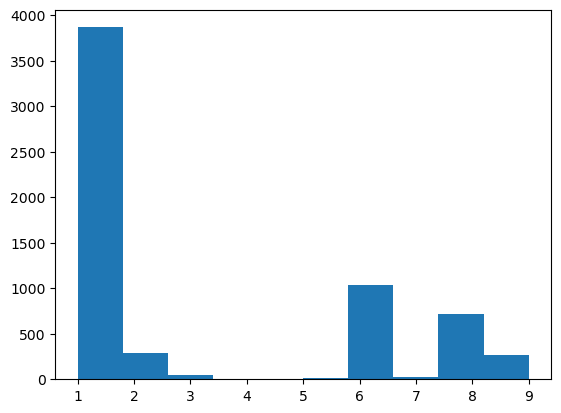

In [ ]:
plt.hist(X_train['RAC1P'])


In [ ]:
datamix = X_test.copy()
datamix['label'] = y_test

X_test_race_cau = datamix.loc[datamix.RAC1P == 1.0].drop(columns='label')
X_test_race_other = datamix.loc[datamix.RAC1P != 1.0].drop(columns='label')

y_test_race_cau = datamix.loc[datamix.RAC1P == 1.0].label
y_test_race_other = datamix.loc[datamix.RAC1P != 1.0].label

In [ ]:
best_GB = GradientBoostingClassifier(criterion='friedman_mse', learning_rate=0.03880510732210184,
                                     loss='exponential', n_estimators=130)

best_AB = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.05011872336272722, n_estimators=140)

best_RF = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=2, n_estimators=130, n_jobs=-1)

best_SVM = SVC(C=0.0107977516232771, degree=2, kernel='rbf')

best_models = [best_GB, best_AB, best_RF, best_SVM]

for model in best_models:
    model.fit(X_train, y_train)

In [ ]:
y_pred_GB_cau = best_GB.predict(X_test_race_cau)
y_pred_RF_cau = best_RF.predict(X_test_race_cau)
y_pred_SVM_cau = best_SVM.predict(X_test_race_cau)
y_pred_AB_cau = best_AB.predict(X_test_race_cau)

y_pred_GB_other = best_GB.predict(X_test_race_other)
y_pred_RF_other = best_RF.predict(X_test_race_other)
y_pred_SVM_other = best_SVM.predict(X_test_race_other)
y_pred_AB_other = best_AB.predict(X_test_race_other)

In [ ]:
print("\nGB (caucasian - other)")
print(classification_report(y_test_race_cau, y_pred_GB_cau))
print(classification_report(y_test_race_other, y_pred_GB_other))

print("\nAB (caucasian - other)")
print(classification_report(y_test_race_cau, y_pred_AB_cau))
print(classification_report(y_test_race_other, y_pred_AB_other))

print("\nSVM (caucasian - other)")
print(classification_report(y_test_race_cau, y_pred_SVM_cau))
print(classification_report(y_test_race_other, y_pred_SVM_other))

print("\nRF (caucasian - other)")
print(classification_report(y_test_race_cau, y_pred_RF_cau))
print(classification_report(y_test_race_other, y_pred_RF_other))


GB (caucasian - other)
              precision    recall  f1-score   support

       False       0.82      0.85      0.84       531
        True       0.80      0.77      0.79       419

    accuracy                           0.81       950
   macro avg       0.81      0.81      0.81       950
weighted avg       0.81      0.81      0.81       950

              precision    recall  f1-score   support

       False       0.86      0.89      0.88       409
        True       0.77      0.71      0.74       207

    accuracy                           0.83       616
   macro avg       0.81      0.80      0.81       616
weighted avg       0.83      0.83      0.83       616


AB (caucasian - other)
              precision    recall  f1-score   support

       False       0.79      0.89      0.83       531
        True       0.83      0.70      0.76       419

    accuracy                           0.80       950
   macro avg       0.81      0.79      0.80       950
weighted avg       0.81   

In [ ]:
# Go search the rest of the data (without race) and test
feat_without_race = pd.read_csv('acsincome_ca_features_without_race.csv')
X_WR, y_WR = preprocess(feat_without_race, label_raw)

X_WR_train, X_WR_test, y_WR_train, y_WR_test = train_test_split(X_WR, y_WR, test_size=0.2)
y_WR_train = y_WR_train.to_numpy().reshape(1,-1)[0]

for model in best_models:
    model.fit(X_WR_train, y_WR_train)

In [ ]:
for model in best_models:
    print("===================================")
    print(model)
    y_pred = model.predict(X_WR_test)
    print(classification_report(y_WR_test, y_pred))
    print("-----------------------------------")
    print(confusion_matrix(y_WR_test, y_pred))

GradientBoostingClassifier(learning_rate=0.03880510732210184,
                           loss='exponential', n_estimators=130)
              precision    recall  f1-score   support

       False       0.82      0.87      0.85       880
        True       0.82      0.76      0.79       686

    accuracy                           0.82      1566
   macro avg       0.82      0.81      0.82      1566
weighted avg       0.82      0.82      0.82      1566

-----------------------------------
[[764 116]
 [164 522]]
AdaBoostClassifier(learning_rate=0.05011872336272722, n_estimators=140)
              precision    recall  f1-score   support

       False       0.79      0.89      0.84       880
        True       0.83      0.70      0.76       686

    accuracy                           0.81      1566
   macro avg       0.81      0.80      0.80      1566
weighted avg       0.81      0.81      0.80      1566

-----------------------------------
[[780 100]
 [203 483]]
RandomForestClassifier(criter